## Author - Sanjali Mehta

# Training Project 

## Task(1)-Object Detection 

Implementing an Object Detector for detecting the class of objects in any sample image or a video

## Importing the required libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

### Loading the trained model

In [2]:
Config_Ref = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
Frozen_Mod = 'frozen_inference_graph.pb'
pre_model=cv2.dnn_DetectionModel(Frozen_Mod,Config_Ref)

### creating a list file to access the class objects 

In [3]:
class_Object = []
Class_File = 'object.txt'
with open(Class_File,'rt') as fpt:
    class_Object = fpt.read().rstrip('\n').split('\n')   
print(class_Object) 

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


### Setting and modifying configuration of the model

In [4]:
pre_model.setInputSize(320,320)
pre_model.setInputScale(1.0/127.5)
pre_model.setInputMean((127.5,127.5,127.5))
pre_model.setInputSwapRB(True)

<dnn_Model 000002B40627CD30>

### Reading and showing the sample image

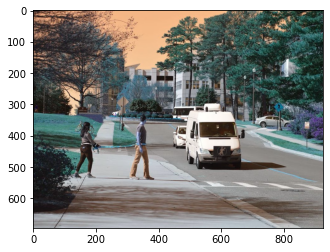

In [5]:
img = cv2.imread("Image.jpg")
plt.imshow(img);

In [6]:
ClassIndex, confidence, bbox = pre_model.detect(img,confThreshold=0.55)
print(ClassIndex)

[[1]
 [3]
 [1]
 [8]]


### Detection in a sample image

In [7]:
font_Scale = 2
font = cv2.FONT_HERSHEY_COMPLEX
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(0,255,0), 2)
    cv2.putText(img,class_Object[ClassInd-1],(boxes[0]+100,boxes[0]+50), font, fontScale=font_Scale,color=(255,0,0), thickness=2)
cv2.imshow('Output Image', img);
cv2.waitKey(0)

-1

### Detection in a sample video

In [8]:
cap = cv2.VideoCapture("Sample.mp4")
#webcam = cv2.VideoCapture(0)

# condition for the opening of the video
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot detect the video")
    
font_Scale = 1
font = cv2.FONT_HERSHEY_SIMPLEX

while(1):
    ret,frame = cap.read()
    ClassIndex, confidence, bbox = pre_model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(0,255,0), 2)
                cv2.putText(frame,class_Object[ClassInd-1],(boxes[0]+10,boxes[0]+40), font, fontScale=font_Scale,color=(255,0,0), thickness=2)
                
    cv2.imshow('Detection',frame)
                
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
()
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[ 1]
 [ 1]
 [10]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [10]]
[[ 1]
 [ 1]
 [ 1]
 [10]]
[[ 1]
 [10]
 [ 1]
 [10]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 

[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 

[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
()
[[1]]
[[1]]
[[1]]
()


error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-vi271kac\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
